# Airbnb NYC EDA & Price Prediction Project

### Project Title
Exploratory Data Analysis and Price Prediction on Airbnb NYC Listings

### Project Overview
This project analyzes Airbnb listings in New York City to uncover trends, patterns, and insights about pricing, room types, and neighborhoods. Additionally, a simple machine learning model is built to predict listing prices based on key features.

### Objective
- Understand the Airbnb NYC dataset and clean the data for analysis.
- Perform exploratory data analysis (EDA) to identify trends and patterns.
- Visualize insights using charts and graphs.
- Build a predictive model to estimate Airbnb prices.
- Document findings for actionable insights.

### Dataset Description
Kaggle Airbnb dataset: [NYC Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)
- Number of rows / columns: e.g., 48,895 listings, 16 columns
**Key columns:**  
- `name` → Listing name  
- `host_id`, `host_name` → Host details  
- `neighbourhood_group`, `neighbourhood` → Location  
- `latitude`, `longitude` → Geo-coordinates  
- `room_type` → Type of listing  
- `price` → Listing price  
- `minimum_nights` → Minimum nights for booking  
- `number_of_reviews` → Total reviews per listing  
- `last_review` → Date of most recent review  
- `reviews_per_month` → Average monthly reviews  
- `calculated_host_listings_count` → Number of listings the host owns  
- `availability_365` → Number of days listing is available in a year

### Tools & Libraries
- Python (programming language)
- Pandas → Data manipulation and cleaning
- NumPy → Numerical computations
- Matplotlib & Seaborn → Data visualization
- Scikit-learn → Machine learning (price prediction)
- Jupyter Notebook → Interactive coding and documentation

### Methodology
- Load and inspect the dataset
- Clean the data (handle missing values, remove outliers)
- Perform EDA (univariate, bivariate, geospatial analysis)
- Feature engineering for machine learning
- Train-test split and model building (Linear Regression)
- Evaluate model performance (RMSE, R²)
- Document insights and conclusions

### Expected Outcome
- Understand what factors influence Airbnb prices in NYC
- Visualizations of price distributions, room types, and neighborhood trends
- A simple regression model predicting prices
- Clear, professional documentation for portfolio showcase

## Load the Dataset

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Notebook settings
import warnings
warnings.filterwarnings('ignore')

# Visualization style for cleaner plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)



In [2]:
# Loading the dataset
df= pd.read_csv("/Users/neha/Documents/Airbnb EDA Analysis/AB_NYC_2019.csv")

# Display the first few rows of the dataset
df.head()
# Shape of the dataset
df.shape
# Information about the dataset
df.info()
# Summary statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Key Insights from Data Description**

- `Price`: Avg ~$152, but with huge variation. Min = 0 (errors), Max = 10,000 (outliers) → need to filter.

- `Minimum_nights`: Min = 1 (reasonable), Max = 1250 (3+ years, unrealistic) → cap or drop extremes.  

- `Number_of_reviews`: Avg ~23, Max = 629 (popular), many listings with 0 reviews → shows popularity differences. 

- `Reviews_per_month`: Many missing values → fill NaN with 0 (means no reviews).  

- `Availability_365`: Ranges 0–365 → shows some listings are full-year, others seasonal.  

- `calculated_host_listings_count `: Most hosts have 1 listing, Max = 327 → some “super hosts.”  


## Data Cleaning

In [32]:
# Checking for missing values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
# Distribution of listings across neighbourhood groups
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [34]:
# Distribution of listings across room types
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

**Handling Missing Values**

After checking for missing values, we observed:

- `name`: 16 missing → not critical, can drop these rows.  
- `host_name`: 21 missing → very few, safe to drop.  
- `last_review`: ~10,000 missing → means no reviews given.  
- `reviews_per_month`: ~10,000 missing → matches above, should be filled with 0.  
- Other columns have no missing values.  


In [35]:
# handling missing values
df = df.dropna(subset=['name', 'host_name'])  # Drop rows where 'name' or 'host_name' is missing
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
## change data type of last_review to datetime
df['last_review']=pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  number_

In [37]:
# Checking for price outliers greater than $3000
df[df['price'] > 3000].shape
total_outliers = df[df['price'] > 3000].shape[0]
percent_outliers = (total_outliers / len(df)) * 100
print(f"{total_outliers} listings ({percent_outliers:.2f}%) are above $3000")


45 listings (0.09%) are above $3000


In [38]:
# Since there are very few listings with price > $3000, we can safely remove these outliers for our analysis.
df = df[df['price'] <= 3000]
df.shape

(48813, 16)

In [39]:
# Checking where price is 0
df[df['price'] == 0].shape


(11, 16)

In [40]:
# Removing listings with price 0 as they are likely errors
df = df[df['price'] > 0]
# Verifying the shape after removing price 0 listings
df.shape

(48802, 16)

Removed 11 listings with price = 0 and listings with price above $3,000, as prices cannot be zero or unrealistically high. Now all listings have realistic positive prices.


In [41]:
# Checking for minimum_nights outliers
df['minimum_nights'].describe()


count    48802.000000
mean         6.998258
std         19.992485
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Maximum value is 1250 which is very high which is not practical for airbnb listings so we will check how many listings have minimum_nights > 365

In [43]:
# Check how many listings have minimum_nights > 365
df[df['minimum_nights'] > 365].shape
total_min_night_outliers = df[df['minimum_nights'] > 365].shape[0]
percent_min_night_outliers = (total_min_night_outliers / len(df)) * 100
print(f"{total_min_night_outliers} listings ({percent_min_night_outliers:.2f}%) have minimum_nights > 365")


13 listings (0.03%) have minimum_nights > 365


Since the percentage is very small (0.03%), we can remove these outliers

In [44]:
# Remove listings with minimum_nights > 365 as they are outliers
df = df[df['minimum_nights'] <= 365]
df.shape
df['minimum_nights'].max()

np.int64(365)

In [45]:
df.shape

(48789, 16)

Now all listings have realistic minimum night requirements

In [28]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

In this section, we explore the Airbnb NYC dataset to uncover patterns, trends, and insights about pricing, room types, neighborhoods, and reviews. We will analyze individual variables (univariate), relationships between variables (bivariate), and temporal trends.


### Price Univariate Analysis

We will analyze the `price` column to understand the distribution of Airbnb listings in NYC. This helps identify typical prices, high-end outliers, and overall price variability.

In [46]:

# Basic stats
print("Price column summary:")
print(f"Count   : {df['price'].count()}")
print(f"Mean    : {df['price'].mean():.2f}")
print(f"Median  : {df['price'].median()}")
print(f"Std Dev : {df['price'].std():.2f}")
print(f"Min     : {df['price'].min()}")
print(f"Max     : {df['price'].max()}")



Price column summary:
Count   : 48789
Mean    : 147.64
Median  : 105.0
Std Dev : 157.55
Min     : 10
Max     : 3000


The price distribution is right-skewed: median price is $105 while the mean is $147, indicating a few very expensive listings raise the average. The high standard deviation (157) shows strong variability, so most listings cluster around lower prices with a long tail of luxury stays.

In [47]:
print("Price percentiles:")
print(df['price'].quantile([0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))


Price percentiles:
0.05     40.0
0.25     69.0
0.50    105.0
0.75    175.0
0.90    265.2
0.95    350.0
0.99    750.0
Name: price, dtype: float64


Most listings (90%) are below $265, with only 1% of listings above $799, indicating a few very expensive outliers.

**Visualization**

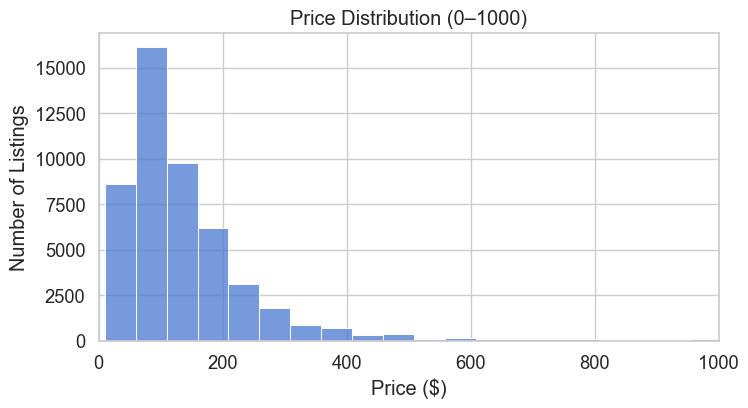

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=60)
plt.xlim(0, 1000)  # zoom into realistic range
plt.title("Price Distribution (0–1000)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.show()

**Price Distribution (0–1000)**

- Most Airbnb listings are priced under $200 per night.  
- The distribution is heavily right-skewed: a few listings are priced above $500.  
- This confirms our earlier observation from percentiles: the majority of listings are affordable, while a small fraction are very expensive.  
- The histogram clearly shows the long tail of high-priced listings.


**Boxplot**

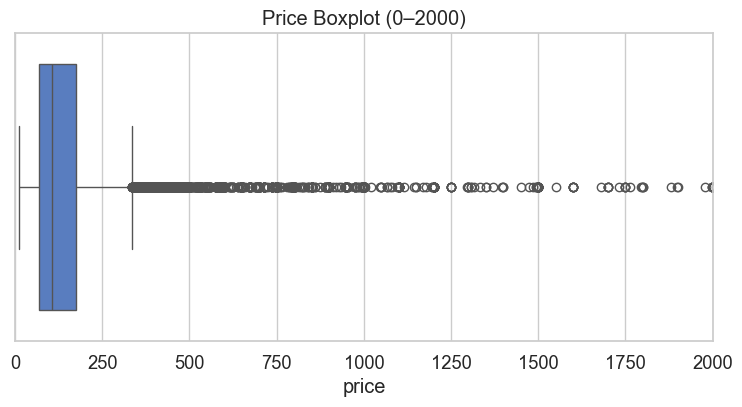

In [49]:
plt.figure(figsize=(9,4))
sns.boxplot(x=df['price'])
plt.xlim(0, 2000)
plt.title("Price Boxplot (0–2000)")
plt.show()

The boxplot visualizes the median, quartiles, and high-priced outliers. Median price is $106. Outliers beyond $1000 are visible as dots.

### Minimum Nights Univariate Analysis

We will analyze the `minimum_nights` column to understand the distribution of Airbnb listings in NYC. TThis column tells us the minimum number of nights required to book a listing.

In [50]:
#Basic stats
print("Minimum Nights column summary:")
print(f"Count : {df['minimum_nights'].count()}")
print(f"Mean : {df['minimum_nights'].mean():.2f}")
print(f"Median : {df['minimum_nights'].median()}")
print(f"Std Dev : {df['minimum_nights'].std():.2f}")
print(f"Min : {df['minimum_nights'].min()}")
print(f"Max : {df['minimum_nights'].max()}")    

Minimum Nights column summary:
Count : 48789
Mean : 6.83
Median : 3.0
Std Dev : 16.42
Min : 1
Max : 365


The `minimum_nights` is right-skewed: median is 3 nights while the mean is 6.83 nights, indicating a few very expensive listings raise the average. The high standard deviation (16.42) much higher than the median indiacating a right- skewed distribution, so most listings have low minimum night requirements, a small number require much longer stays
Overall, the majority of listings are accessible for short-term visitors, but there are some listings with much higher minimum stay requirements

In [51]:
# Percentiles
print("\nPercentiles:")
print(df['minimum_nights'].quantile([0.5, 0.75, 0.90, 0.95, 0.99]))


Percentiles:
0.50     3.0
0.75     5.0
0.90    28.0
0.95    30.0
0.99    40.0
Name: minimum_nights, dtype: float64


Most Airbnb listings require about 5 minimum nights. This means majority of the listings are suitable for short term stays. Only 10% require longer stays.

**Visualization**

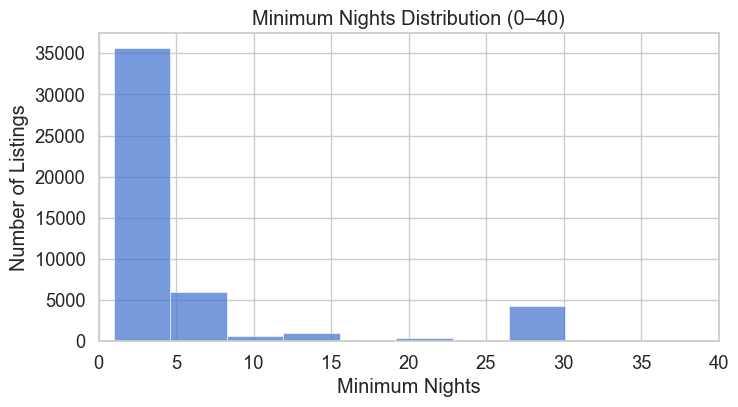

In [52]:
plt.figure(figsize=(8,4))
sns.histplot(df['minimum_nights'], bins=100)
plt.xlim(0, 40)  # zoom into realistic range
plt.title("Minimum Nights Distribution (0–40)")
plt.xlabel("Minimum Nights")
plt.ylabel("Number of Listings")
plt.show()

This histogram shows that most Airbnb listings in NYC require only a few minimum nights, with the majority clustered between 1 and 5 nights. Listings with higher minimum night requirements are much less common.

**Boxplot**

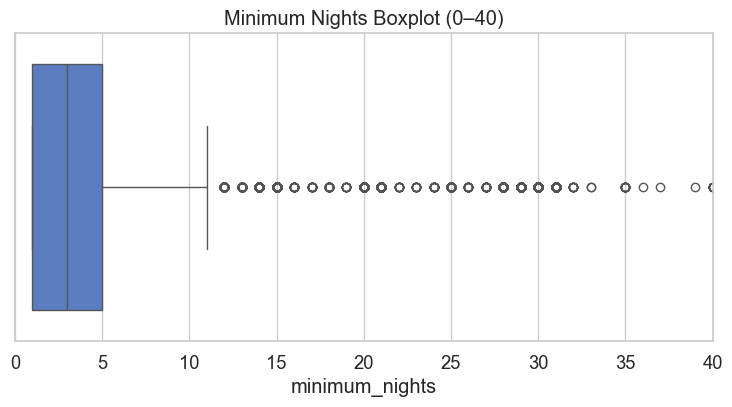

In [53]:
plt.figure(figsize=(9,4))
sns.boxplot(x=df['minimum_nights'])
plt.xlim(0, 40) # zoom into realistic range
plt.title("Minimum Nights Boxplot (0–40)")
plt.show()

The boxplot shows most listings have low minimum night requirements, with a few outliers needing much longer stays.

### Room Type Univariate Distribution

Show counts/percentages of each room type and This will highlight which accommodation type dominates Airbnb NYC.


In [54]:
print("Room Type Counts:")
print(df['room_type'].value_counts())

print("\nRoom Type Percentages:")
print((df['room_type'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


Room Type Counts:
room_type
Entire home/apt    25345
Private room       22288
Shared room         1156
Name: count, dtype: int64

Room Type Percentages:
room_type
Entire home/apt    51.95%
Private room       45.68%
Shared room         2.37%
Name: proportion, dtype: object


- Most common room type is **Entire home/apt**, followed by **Private room**.  
- **Shared rooms** and **Hotel rooms** make up only a small fraction of listings.  
- This indicates Airbnb NYC is mainly used for full apartments and private rooms.


**Visualization**

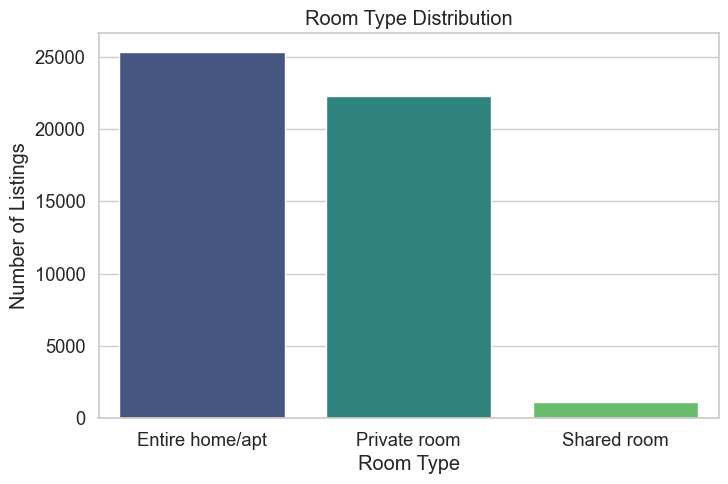

In [55]:
# Countplot for room types
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette="viridis")
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()



### Neighbourhood Group Distribution
Understanding how listings are spread across NYC’s 5 boroughs.


In [56]:
#count and percentage of each room type
print("Neighbourhood Group Counts:")
print(df['neighbourhood_group'].value_counts())

print("\nNeighbourhood Group Percentages:")
print((df['neighbourhood_group'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


Neighbourhood Group Counts:
neighbourhood_group
Manhattan        21606
Brooklyn         20062
Queens            5661
Bronx             1088
Staten Island      372
Name: count, dtype: int64

Neighbourhood Group Percentages:
neighbourhood_group
Manhattan        44.28%
Brooklyn         41.12%
Queens            11.6%
Bronx             2.23%
Staten Island     0.76%
Name: proportion, dtype: object


**Neighbourhood Group Distribution**

- Manhattan and Brooklyn dominate Airbnb listings.  
- Queens has a moderate share, while Bronx and Staten Island are minimal.  
- This aligns with tourism and population density patterns in NYC.  


**Visualization**

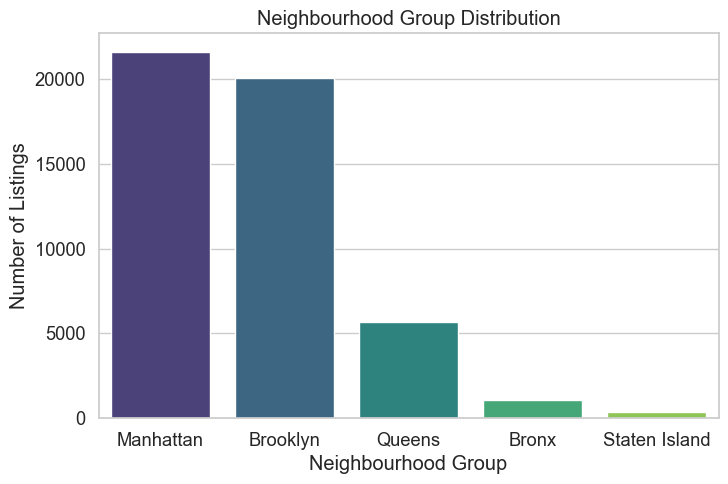

In [57]:
#count chart for neighbourhood group distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='neighbourhood_group',order=df['neighbourhood_group'].value_counts().index,palette="viridis")
plt.title("Neighbourhood Group Distribution")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

### Neighbourhood Analysis

The `neighbourhood` column contains the specific areas in New York City where listings are located. Since there are many neighbourhoods, we will focus on the **top 10 neighbourhoods by number of listings** to understand where most listings are concentrated.


In [58]:
# Count of unique neighbourhoods
print("Number of unique neighbourhoods:", df['neighbourhood'].nunique())

# Top 10 neighbourhoods by listing count
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10)
top_neighbourhoods


Number of unique neighbourhoods: 221


neighbourhood
Williamsburg          3913
Bedford-Stuyvesant    3705
Harlem                2651
Bushwick              2458
Upper West Side       1963
Hell's Kitchen        1953
East Village          1850
Upper East Side       1794
Crown Heights         1562
Midtown               1543
Name: count, dtype: int64

**Visualization**

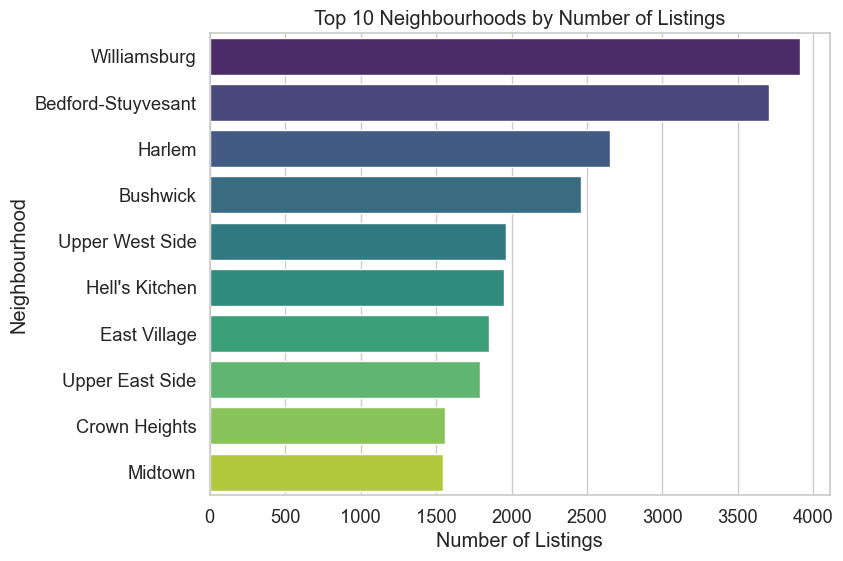

In [59]:
# Bar plot for top 10 neighbourhoods
plt.figure(figsize=(8,6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='viridis')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.show()

This bar plot shows:
- Manhattan neighbourhoods dominate the top 10 list, indicating high listing density in the city center.
- Some popular boroughs like Brooklyn also feature prominently.
- This suggests that most Airbnb activity is concentrated in a few high-demand areas.
- Less popular neighbourhoods may indicate lower tourism or fewer hosts.


### Number of Reviews Analysis

The `number_of_reviews` column shows how many reviews each listing has received. This helps us understand listing popularity and host engagement. We will explore its distribution and check for outliers.


In [60]:
# Basic statistics
print("Number of Reviews Summary:")
print(f"Count : {df['number_of_reviews'].count()}")
print(f"Mean : {df['number_of_reviews'].mean():.2f}")
print(f"Median : {df['number_of_reviews'].median()}")
print(f"Std Dev : {df['number_of_reviews'].std():.2f}")
print(f"Min : {df['number_of_reviews'].min()}")
print(f"Max : {df['number_of_reviews'].max()}")

# Key Percentiles
print("\nKey Percentiles:")
print(df['number_of_reviews'].quantile([0.5, 0.75, 0.90, 0.95, 0.99]))


Number of Reviews Summary:
Count : 48789
Mean : 23.30
Median : 5.0
Std Dev : 44.57
Min : 0
Max : 629

Key Percentiles:
0.50      5.0
0.75     24.0
0.90     70.0
0.95    114.0
0.99    214.0
Name: number_of_reviews, dtype: float64


50% of listings have ≤5 reviews, 75% ≤24 reviews.  
90% of listings have ≤70 reviews, 95% ≤114, 99% ≤214 reviews → a few very popular listings have many reviews.  

**Visualization**

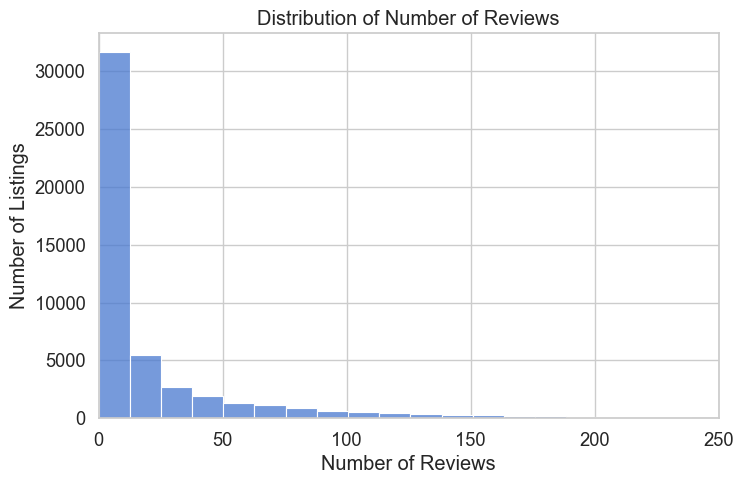

In [61]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['number_of_reviews'], bins=50)
plt.xlim(0, 250)  # Focus on main range
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.title('Distribution of Number of Reviews')
plt.show()

The histogram shows the frequency distribution of listings based on the total number of reviews.

- Most listings have **very few reviews** (bars are highest near 0–10 reviews).  
- The frequency drops quickly as the number of reviews increases.  
- A few listings have **very high review counts** (outliers), which are not clearly visible unless we zoom out or limit the x-axis.  
- This plot helps us **see the overall spread and concentration** of review counts.


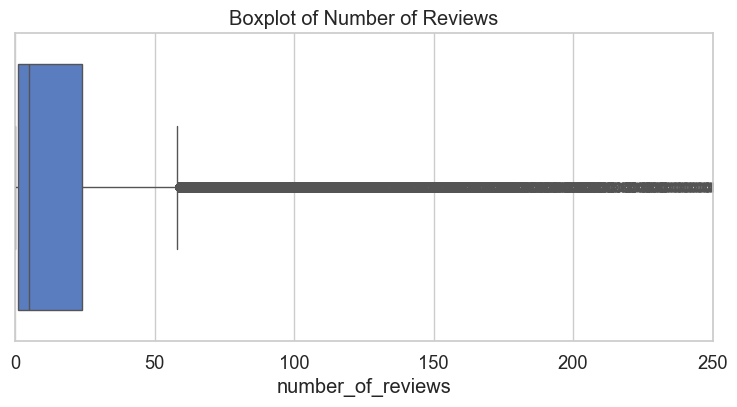

In [62]:
# Boxplot
plt.figure(figsize=(9,4))
sns.boxplot(x=df['number_of_reviews'])
plt.xlim(0, 250)
plt.title('Boxplot of Number of Reviews')
plt.show()

The boxplot visualizes the distribution, median, quartiles, and outliers for `number_of_reviews`.

- The **median line** inside the box shows that half of the listings have ≤5 reviews.  
- The **box (Q1–Q3)** shows that 50% of listings have 5–24 reviews (interquartile range).  
- The **whiskers** extend to roughly 1.5*IQR from Q1 and Q3, showing the typical range.  
- **Dots beyond the whiskers** are outliers — listings with unusually high reviews (up to 214 or more).  
- This plot is useful to **identify extreme listings** and understand skewness in the data.


### Reviews Per Month Analysis

The `reviews_per_month` column shows the average number of reviews a listing receives per month. Many listings have no reviews, so missing values are treated as 0. We will examine basic stats, key percentiles, and visualize the distribution.


In [63]:
# Fill missing values with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Basic statistics
print("Reviews per Month Summary:")
print(f"Count : {df['reviews_per_month'].count()}")
print(f"Mean : {df['reviews_per_month'].mean():.2f}")
print(f"Median : {df['reviews_per_month'].median()}")
print(f"Std Dev : {df['reviews_per_month'].std():.2f}")
print(f"Min : {df['reviews_per_month'].min()}")
print(f"Max : {df['reviews_per_month'].max()}")

# Key Percentiles
percentiles = df['reviews_per_month'].quantile([0.5, 0.75, 0.90, 0.95, 0.99])
print("\nKey Percentiles:")
print(percentiles)


Reviews per Month Summary:
Count : 48789
Mean : 1.09
Median : 0.37
Std Dev : 1.60
Min : 0.0
Max : 58.5

Key Percentiles:
0.50    0.37
0.75    1.59
0.90    3.25
0.95    4.31
0.99    6.80
Name: reviews_per_month, dtype: float64


These Stats Show:

- Median (50%) = 0.37 → half of listings receive less than 0.37 reviews per month.  
- 75% of listings receive ≤1.59 reviews per month.  
- 90% receive ≤3.25, 95% ≤4.31, 99% ≤6.80 reviews per month → very few listings are highly active.  
- Mean = 1.09 → slightly higher than median due to right-skew from active listings.  
- Max = 58.5 → extreme outlier showing a very active listing.  
- Distribution is **right-skewed**, with most listings receiving very few reviews.  
- Boxplot would show the majority clustered near 0–2 reviews, with whiskers and outliers highlighting highly active listings.


**Visualization**

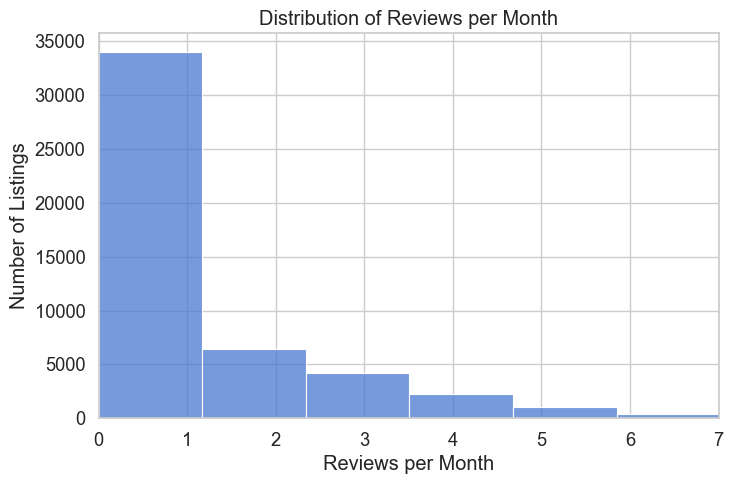

In [64]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['reviews_per_month'], bins=50)
plt.xlim(0, 7)  # focus on main range to show majority of listings
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Listings')
plt.title('Distribution of Reviews per Month')
plt.show()

- Most listings have very few reviews per month (0–2 reviews).
- The frequency drops as the number of reviews increases.
- Extreme values (up to 58.5 reviews/month) exist but are rare and not visible clearly in this range.

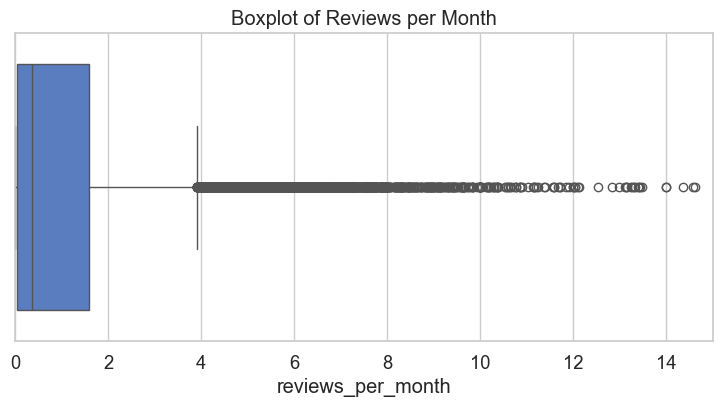

In [65]:
# Boxplot
plt.figure(figsize=(9,4))
sns.boxplot(x=df['reviews_per_month'])
plt.xlim(0, 15)  # focus on main range
plt.title('Boxplot of Reviews per Month')
plt.show()

- Median = 0.37 → half of listings have fewer than 0.37 reviews/month.
- 50% of listings lie between Q1 and Q3 (0–1.59 reviews/month) → most listings are low-activity.
- Whiskers show typical range; points beyond whiskers are outliers.
- Right-skewed distribution due to few highly active listings (up to 58.5 reviews/month).

### Calculated Host Listings Count Analysis

This column shows how many listings a host manages. It helps differentiate between individual hosts (with 1 listing) and professional hosts (with many listings).


In [66]:
# Basic statistics
print("Calculated Host Listings Count Summary:")
print(f"Count : {df['calculated_host_listings_count'].count()}")
print(f"Mean : {df['calculated_host_listings_count'].mean():.2f}")
print(f"Median : {df['calculated_host_listings_count'].median()}")
print(f"Std Dev : {df['calculated_host_listings_count'].std():.2f}")
print(f"Min : {df['calculated_host_listings_count'].min()}")
print(f"Max : {df['calculated_host_listings_count'].max()}")

# Key Percentiles
percentiles = df['calculated_host_listings_count'].quantile([0.5, 0.75, 0.90, 0.95, 0.99])
print("\nKey Percentiles:")
print(percentiles)


Calculated Host Listings Count Summary:
Count : 48789
Mean : 7.15
Median : 1.0
Std Dev : 32.99
Min : 1
Max : 327

Key Percentiles:
0.50      1.0
0.75      2.0
0.90      5.0
0.95     15.0
0.99    232.0
Name: calculated_host_listings_count, dtype: float64


The statistics for calculated_host_listings_count show:

- Most hosts have only 1 listing (median is 1).
- The average (mean) is higher than the median, indicating some hosts manage many listings.
- The standard deviation is large, showing high variability.
- The maximum value is very high, meaning a few hosts are “super hosts” with many properties.

Percentiles (75%, 90%, 95%, 99%) show that almost all hosts have a small number of listings, but a tiny fraction manage dozens or even hundreds.

Overall, most Airbnb hosts in NYC are individuals with one property, but a small number are professional hosts with many listings.

**Visualization**

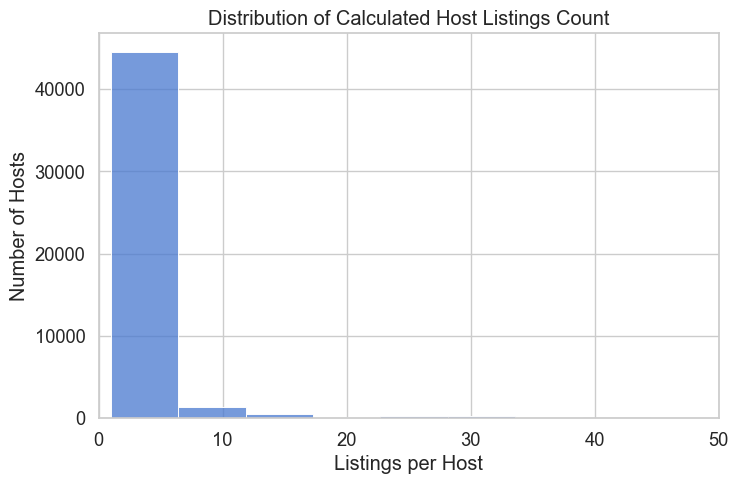

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(df['calculated_host_listings_count'], bins=60)
plt.xlim(0, 50)  # focus on the majority range
plt.xlabel('Listings per Host')
plt.ylabel('Number of Hosts')
plt.title('Distribution of Calculated Host Listings Count')
plt.show()

This Histogram show:
- Vast majority of hosts have 1–2 listings.
- Frequency drops sharply after 5 listings.
- Very few hosts manage more than 50 listings (not visible in zoomed range).
- Extreme outliers exist up to 327 listings, showing large-scale operators.

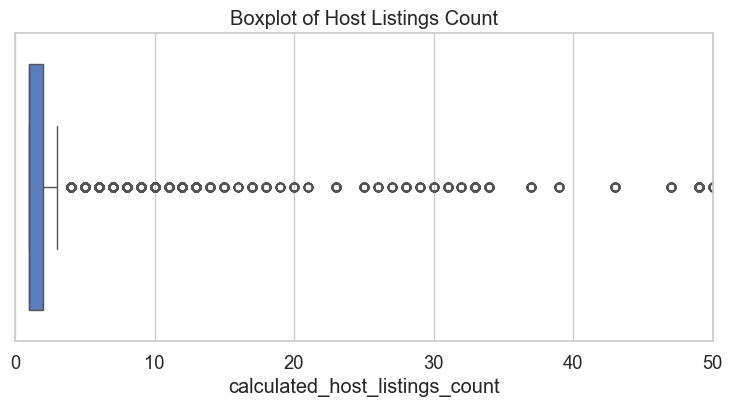

In [68]:
plt.figure(figsize=(9,4))
sns.boxplot(x=df['calculated_host_listings_count'])
plt.xlim(0, 50)  # focus on main distribution
plt.title('Boxplot of Host Listings Count')
plt.show()

oxplot Insights:
- Median = 1 → confirms most hosts are single-listing owners.
- The IQR (Q1–Q3) is very small (1–2 listings), showing low spread for most.
- Many outliers beyond whiskers → represent multi-property/commercial hosts.
- Extreme skew: while most hosts are individuals, a few manage hundreds of listings

### Availability 365 Analysis

This column indicates how many days in a year (0–365) a listing is available for booking. It helps us identify whether listings are mostly long-term, seasonal, or short-term.


In [69]:
# Basic statistics
print("Availability_365 Summary:")
print(f"Count : {df['availability_365'].count()}")
print(f"Mean : {df['availability_365'].mean():.2f}")
print(f"Median : {df['availability_365'].median()}")
print(f"Std Dev : {df['availability_365'].std():.2f}")
print(f"Min : {df['availability_365'].min()}")
print(f"Max : {df['availability_365'].max()}")

# Key Percentiles
percentiles = df['availability_365'].quantile([0.50, 0.75, 0.90, 0.95, 0.99])
print("\nKey Percentiles:")
print(percentiles)


Availability_365 Summary:
Count : 48789
Mean : 112.68
Median : 45.0
Std Dev : 131.55
Min : 0
Max : 365

Key Percentiles:
0.50     45.0
0.75    226.0
0.90    337.0
0.95    359.0
0.99    365.0
Name: availability_365, dtype: float64


These statistics for availability_365 show how many days per year listings are available for booking. Most listings are available for only a few days or not at all (median is low), while some are available year-round (max is 365). The mean is higher than the median, indicating a right-skewed distribution. A small number of listings are always available, but most are seasonal or have limited availability.

**Visualization**

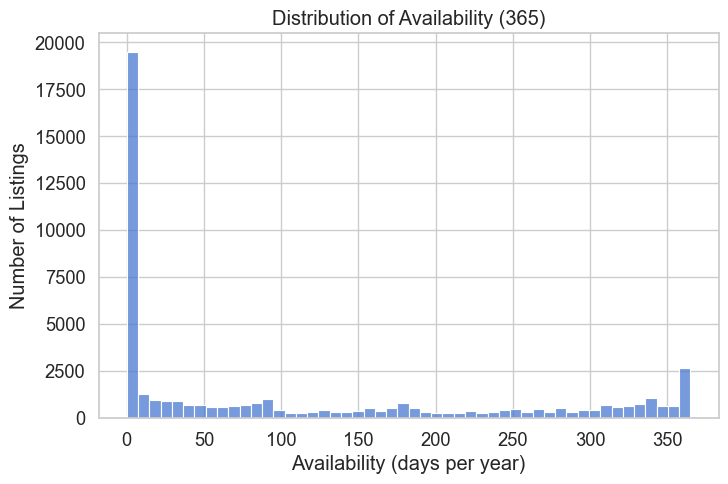

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=50)
plt.xlabel('Availability (days per year)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Availability (365)')
plt.show()

This plot shows:
- Very strong peaks at 0 and 365.
- Large group of listings are either inactive (0) or available year-round (365).
- Seasonal availability is less common but visible in the middle ranges.


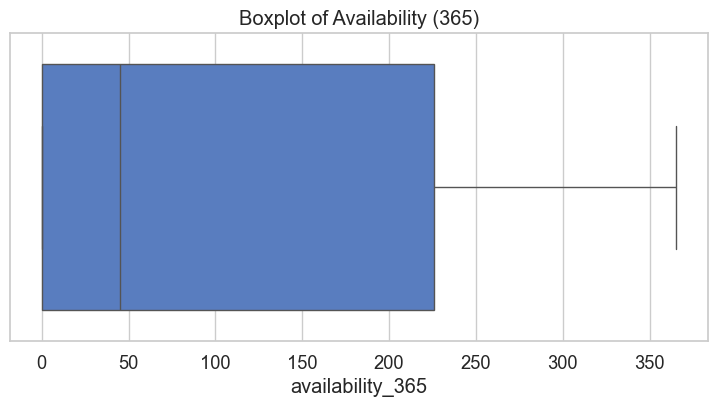

In [71]:
# Boxplot
plt.figure(figsize=(9,4))
sns.boxplot(x=df['availability_365'])
plt.title('Boxplot of Availability (365)')
plt.show()

Boxplot Insights:
- Distribution is heavily concentrated at the extremes (0 and 365).
- Median at 45 days shows many short-term seasonal listings.
- Numerous outliers in between → reflect different host strategies (e.g., 100–200 days availability).

## Bivariate Analysis

### Neighbourhood Group vs Price

We want to see how listing prices differ across the five main neighbourhood groups:  
- Manhattan  
- Brooklyn  
- Queens  
- Bronx  
- Staten Island  

This will help us understand the **location effect on price**.


In [72]:
# Grouped statistics of price by neighbourhood group
price_by_ng = df.groupby('neighbourhood_group')['price'].describe()
print(price_by_ng[['count','mean','50%','max']])


                       count        mean    50%     max
neighbourhood_group                                    
Bronx                 1088.0   87.549632   65.0  2500.0
Brooklyn             20062.0  121.144652   90.0  3000.0
Manhattan            21606.0  189.130612  150.0  3000.0
Queens                5661.0   97.763469   75.0  2600.0
Staten Island          372.0  101.680108   75.0  1250.0


**Visualization**

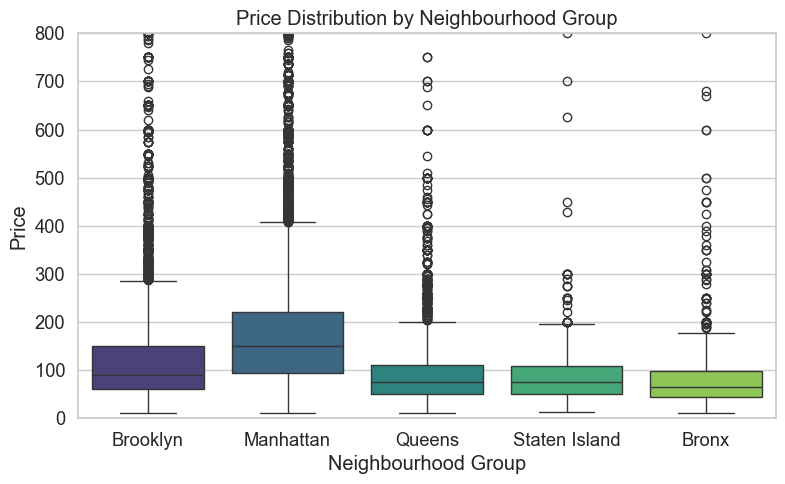

In [73]:
plt.figure(figsize=(9,5))
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='viridis')
plt.ylim(0, 800)  # zoom in to avoid extreme outliers
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

This plot shows that:
- Manhattan has the **highest median and widest spread**, confirming it is the priciest borough.  
- Brooklyn is the second-most expensive but still cheaper than Manhattan.  
- Queens and Staten Island have similar mid-range prices, more affordable than Manhattan/Brooklyn.  
- Bronx has the lowest median and spread, making it the cheapest borough.  
- Outliers exist in all groups, representing luxury listings (up to 3000).

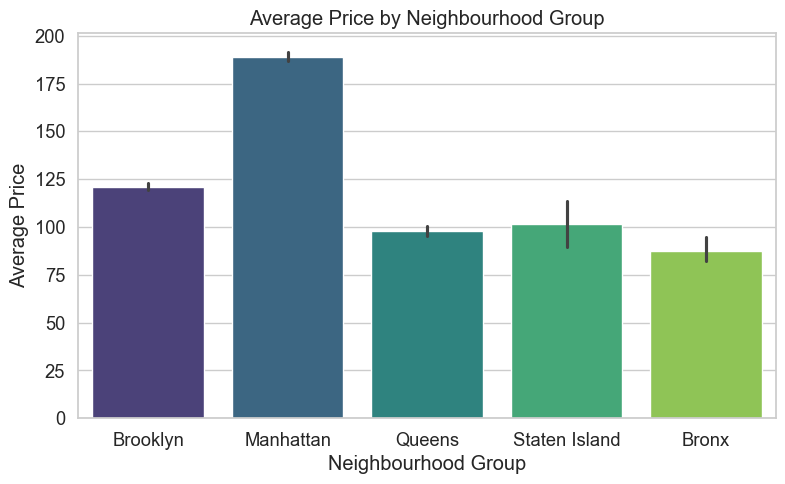

In [74]:
plt.figure(figsize=(9,5))
sns.barplot(x='neighbourhood_group', y='price', data=df, palette='viridis', estimator=np.mean)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

- Confirms ranking: **Manhattan > Brooklyn > Staten Island ≈ Queens > Bronx**.  
- Manhattan’s mean price is nearly **double the Bronx’s**, highlighting premium for central locations.  
- Staten Island has fewer listings, but its mean is slightly higher than Queens due to small sample size.  


**Conclusion:**  
- **Location is a major determinant of price** in NYC Airbnb listings.  
- Price distributions are **right-skewed** with a few extreme outliers in all boroughs.  
- Manhattan dominates the high-price market; Bronx, Queens, and Staten Island offer more **budget-friendly options**.

### Room Type vs Price

We examine how Airbnb prices vary based on room type:  
- Entire home/apartment  
- Private room  
- Shared room  

This helps identify which room types are generally more expensive and which are budget-friendly.


In [75]:
# Grouped statistics
price_by_room = df.groupby('room_type')['price'].describe()
print(price_by_room[['count','mean','50%','max']])

                   count        mean    50%     max
room_type                                          
Entire home/apt  25345.0  203.821267  160.0  3000.0
Private room     22288.0   87.774587   70.0  3000.0
Shared room       1156.0   70.162630   45.0  1800.0


**Visualization**

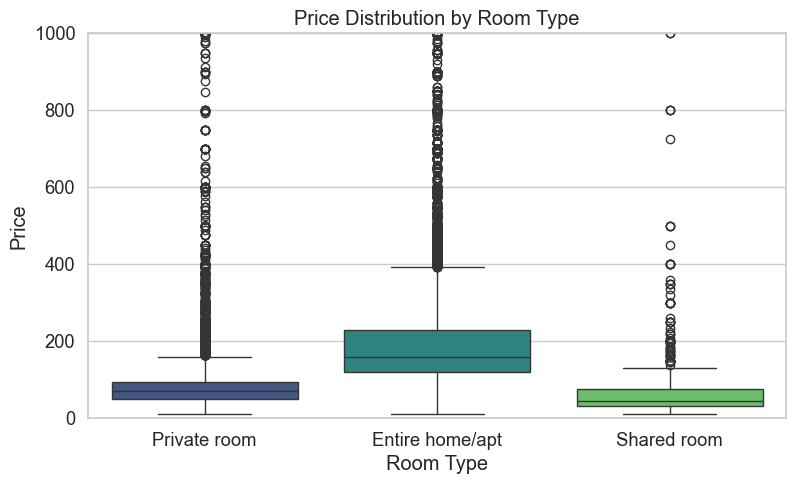

In [76]:
#Boxplot for room type vs price
plt.figure(figsize=(9,5))
sns.boxplot(x='room_type', y='price', data=df, palette='viridis')
plt.ylim(0, 1000)  # focus on majority of listings
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

**Insights from Boxplot:**  
- Entire homes have the highest median and widest spread.  
- Private rooms are moderately priced; shared rooms are cheapest.  
- Outliers exist in all types, but extreme prices are mostly for entire homes.  


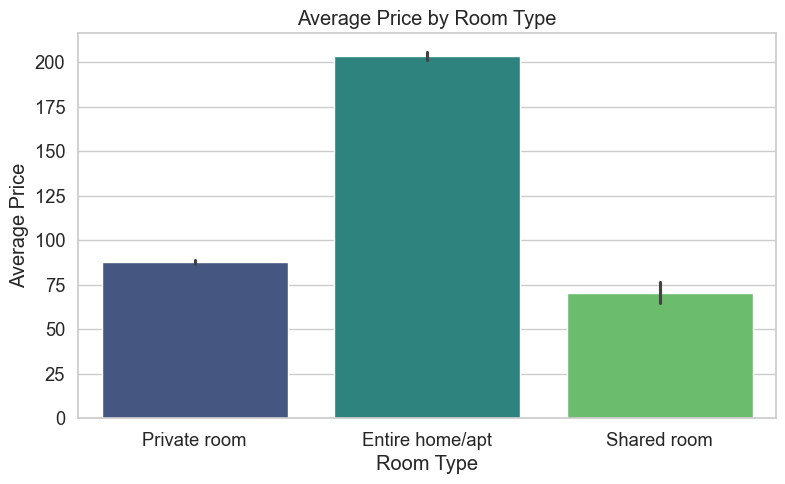

In [77]:
# Bar plot for average price by room type
plt.figure(figsize=(9,5))
sns.barplot(x='room_type', y='price', data=df, palette='viridis', estimator=np.mean)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

This Bar Plot Insights:
- Confirms ranking: Entire home/apartment > Private room > Shared room.  
- Entire homes’ mean price is roughly double private rooms.  
- Shared rooms remain budget-friendly for low-cost travelers. 

**Conclusion:**  
- Room type is a **major driver of price** in Airbnb listings.  
- Entire homes dominate the high-price segment, private/shared rooms cater to mid/budget markets.

### Neighbourhood Group vs Room Type

We want to examine which room types are most common in each borough.  
This helps us understand the type of listings offered in different neighbourhoods.


In [78]:
# Count of room types per neighbourhood group
room_ng_counts = df.groupby(['neighbourhood_group','room_type']).size().unstack()
print(room_ng_counts)


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            378           651           59
Brooklyn                        9541         10110          411
Manhattan                      13157          7970          479
Queens                          2094          3369          198
Staten Island                    175           188            9


**Visualization**

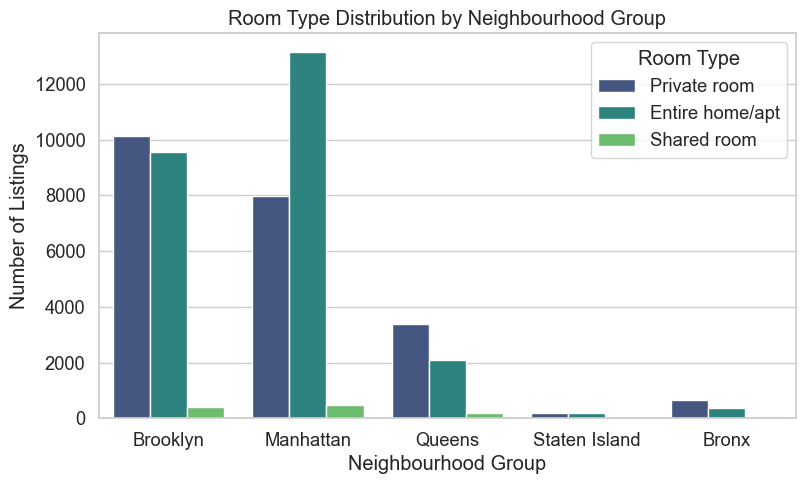

In [79]:
#countplot for room type distribution across neighbourhood groups
plt.figure(figsize=(9,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='viridis')
plt.title('Room Type Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.show()

**Countplot Insights:**  
- Manhattan: mostly entire homes.  
- Bronx & Staten Island: mostly private rooms.  
- Brooklyn: balanced mix of private and entire homes.  
- Shared rooms are consistently the **smallest segment** in all boroughs.

**Conclusion:**  
- Room type distribution **varies by borough**.  
- High-demand areas (Manhattan) favor entire homes.  
- Budget-friendly boroughs (Bronx, Staten Island) favor private rooms.  
- Shared rooms are negligible in the NYC Airbnb market

### Price vs Number of Reviews

We want to see if higher-priced listings tend to have fewer/more reviews.  
This will help understand **popularity vs price** trends.


**Visualization**

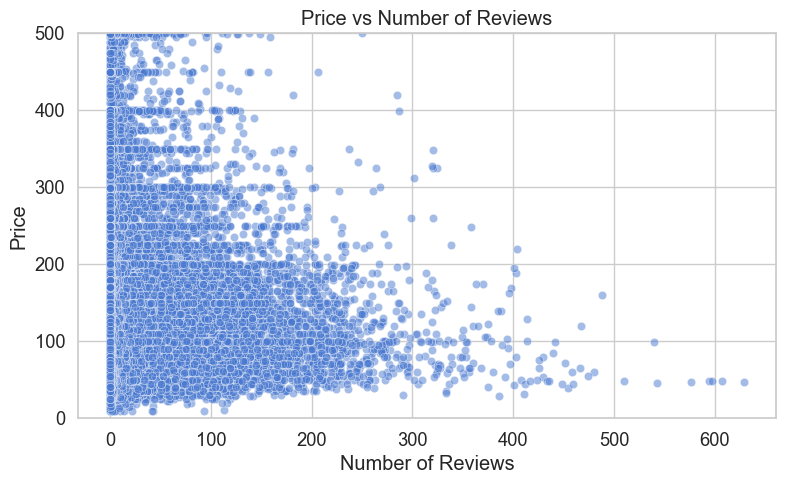

Correlation between Price and Number of Reviews: -0.05757688214208588


In [80]:
# scatter plot of price vs number of reviews
plt.figure(figsize=(9,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.ylim(0, 500)  # zoom to focus on most listings
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

corr = df[['price','number_of_reviews']].corr()
print("Correlation between Price and Number of Reviews:", corr.loc['price','number_of_reviews'])


- The correlation = -0.057 → very weak negative correlation.

**Interpretation:**

- Listings with higher prices tend to have slightly fewer reviews, but the relationship is almost negligible.
- Most high-review listings are in the lower to mid-price range.
- Luxury/high-priced listings have fewer reviews because they are less common and possibly rented less frequently.

**Conclusion:**
- Number of reviews is not strongly related to price, but there’s a tiny negative trend.
- Other factors (location, room type, popularity) likely have a bigger impact on price.

### Reviews per Month vs Availability_365

We want to check if listings available year-round get more reviews.  
This helps identify **active listings vs availability**.


**Visualization**

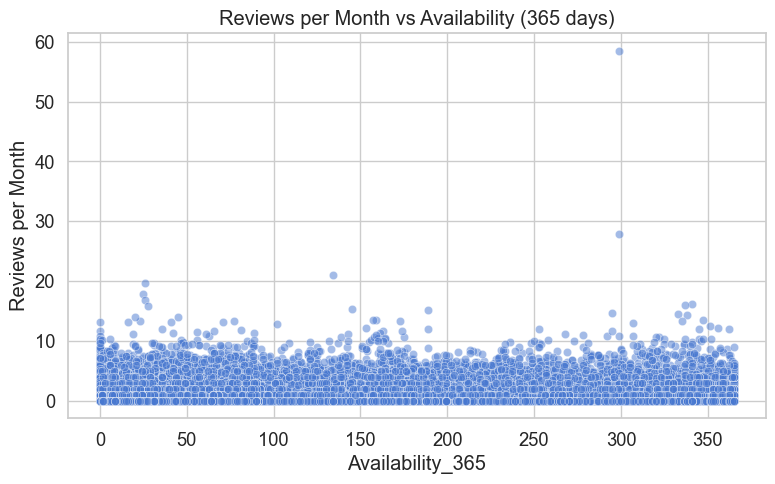

Correlation between Availability_365 and Reviews per Month: 0.164467616651482


In [81]:
# scatter plot of reviews_per_month vs availability_365
plt.figure(figsize=(9,5))
sns.scatterplot(x='availability_365', y='reviews_per_month', data=df, alpha=0.5)
plt.title('Reviews per Month vs Availability (365 days)')
plt.xlabel('Availability_365')
plt.ylabel('Reviews per Month')
plt.show()

#Calculate correlation
corr = df[['availability_365','reviews_per_month']].corr()
print("Correlation between Availability_365 and Reviews per Month:", corr.loc['availability_365','reviews_per_month'])



**Reviews per Month vs Availability_365 – Insights**

- The correlation = 0.164 → weak positive correlation.

**Interpretation:**
- Listings that are available more days per year tend to get slightly more reviews per month.
- However, the relationship is not very strong, indicating that availability alone does not guarantee high review frequency.
- Other factors such as location, room type, and price also affect the number of reviews.

**Conclusion:**
- Active listings (high availability) are somewhat more likely to receive regular reviews, but it is a moderate effect.
- When building predictive models, this feature may contribute slightly but will not dominate.

### Correlation Heatmap (All Numerical Features)

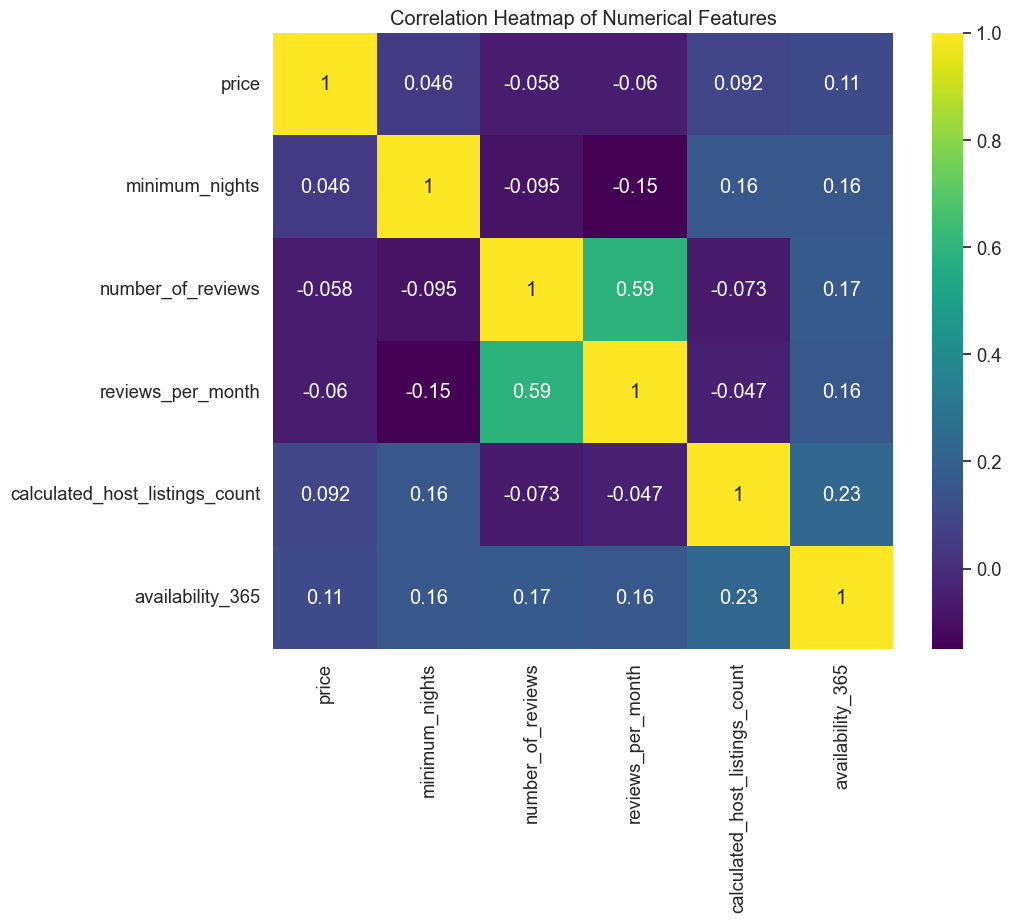

In [82]:
# correlation heatmap of numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


This heatmap shows that Airbnb listings are most concentrated in New York City. Brighter areas on the map indicate neighborhoods with a high number of listings, while darker areas have fewer listings. This helps visualize which parts of NYC are most popular for Airbnb hosts and guests.

## Machine Learning: Predicting Airbnb Prices

- After exploring and cleaning the dataset through univariate and bivariate analysis, we now move towards building a predictive model.  
- The goal is to **predict the listing price of an Airbnb property** based on features such as location, room type, availability, and reviews.  
- This step demonstrates how exploratory insights can be connected to machine learning to create data-driven predictions.  


### Define Target and Features




Our goal is to **predict the price of Airbnb listings**.  
To do this, we need to:  
1. Decide which column is the **target variable** (the thing we want to predict).  
   → Here, the target is `price`.  
2. Select useful **features (independent variables)** that might influence price, such as:  
   - `neighbourhood_group` (location category)  
   - `room_type`  
   - `minimum_nights`  
   - `number_of_reviews`  
   - `reviews_per_month`  
   - `calculated_host_listings_count`  
   - `availability_365`  
3. Encode categorical variables (like `room_type`, `neighbourhood_group`) into numerical form because ML models can’t work directly with text.  


In [83]:
#Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
# Define features (X) and target (y)
X = df[['neighbourhood_group', 'room_type', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]
y = df['price']

# Encode categorical features
encoder = LabelEncoder()
X['neighbourhood_group'] = encoder.fit_transform(X['neighbourhood_group'])
X['room_type'] = encoder.fit_transform(X['room_type'])

X.head()


,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,1,9,0.21,6,365
1,2,0,1,45,0.38,2,355
2,2,1,3,0,0.00,1,365
3,1,0,1,270,4.64,1,194
4,2,0,10,9,0.10,1,0


### Insights

- The target variable is `price`, which we want to predict using other listing attributes.  
- Features include both categorical (`neighbourhood_group`, `room_type`) and numerical variables (`minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`).  
- Categorical features have been converted to numeric using **Label Encoding**, so they can be used by ML models.  
- The dataset is now prepared for the next step: splitting into **training and testing sets** to train and evaluate our model.  
- This step ensures that we have a clean and structured input for building our first predictive model.


### Split Data into Training and Testing Sets

- **Why:**  
  Machine learning models learn patterns from data. To check if the model really works, we need to test it on data it hasn’t seen before.  
  - **Training set:** Used to teach the model  
  - **Testing set:** Used to evaluate the model's performance  

- **Common split ratio:** 80% train, 20% test.  
- **Random state:** Fixing a random seed ensures that results are reproducible.


In [84]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (39031, 7)
Testing features shape: (9758, 7)
Training target shape: (39031,)
Testing target shape: (9758,)


### Insights

- 80% of the data is used to train the model (`X_train`, `y_train`)  
- 20% of the data is kept aside for testing (`X_test`, `y_test`)  
- This ensures that the model is evaluated on **unseen data**, giving a realistic measure of performance.  
- All features and target variables are now ready for building the first predictive model.


### Build a Baseline Linear Regression Model

- **Why Linear Regression?**  
  - It’s simple and interpretable.  
  - Gives a **baseline** performance that we can later improve with more advanced models.  

- **Goal:**  
  - Train the model on training data  
  - Predict listing prices on testing data  
  - Evaluate performance using:
    - **RMSE (Root Mean Squared Error):** Measures average prediction error in dollars (lower is better).  
    - **R² Score:** Proportion of variance in the target explained by the features (closer to 1 is better).


In [85]:
# Dependencies already imported above

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")


Linear Regression RMSE: 150.43
Linear Regression R² Score: 0.14


### Linear Regression Model Insights

- **RMSE:** 150.43  
  - On average, the model's predicted prices are **off by ~$150** compared to the actual listing prices.  
  - This indicates that the baseline model is **not very accurate** for individual predictions.

- **R² Score:** 0.14  
  - Only **14% of the variation in price** is explained by the features we used.  
  - Price is influenced by many other factors not included in the model (e.g., exact location, amenities, seasonal demand).  

- **Key Understanding:**  
  - Linear Regression gives a simple baseline.  
  - Results are low, but this is expected for a dataset with **highly skewed prices and many categorical factors**.  
  - We can now improve the model using **Random Forest**, which captures non-linear relationships and interactions between features.


### Scatter Plot: Predicted vs Actual

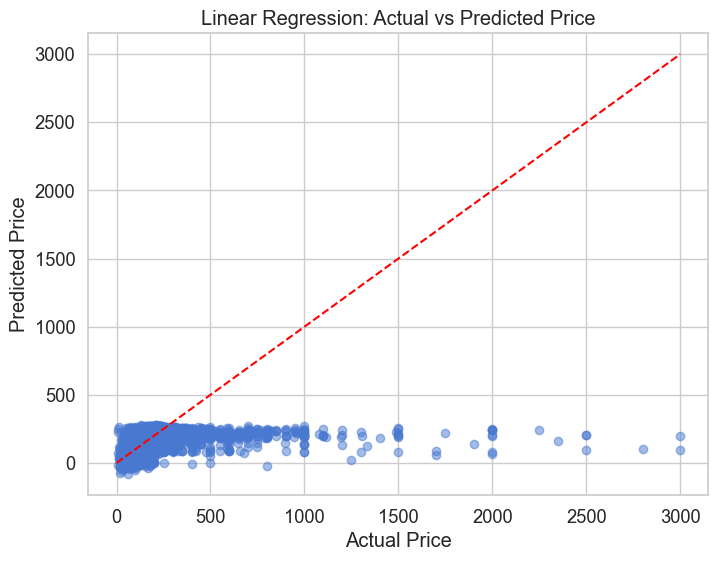

In [86]:
# Visualize predicted vs actual prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Price')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--') # prediction line
plt.show()

**Observation:**  
The Linear Regression predictions deviate significantly for higher-priced listings.  
This indicates that a simple linear model is insufficient to capture the full variability of Airbnb prices, especially outliers.  
For most low-to-mid priced listings, the model performs reasonably well.


In [87]:
# Save the cleaned DataFrame as a CSV file
df.to_csv("data/airbnb_nyc_cleaned.csv", index=False)
